In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime 

In [177]:
data=pd.read_excel('Data Analysis Test Data Set_2023.xlsx', sheet_name='Patient Data')
data.head()

,Facility Location,PatientID,AgeLastVisit,AgeGroup,Gender,Registration Date,ART Status,LastRegimen,LastRegimenLine,LastCD4,LastWHO,LastVisit,LastStatus
0,Kampala,1,61.7,Adult,Female,2006-12-29,ART,3TC+EFV+TDF,NaN,882.0,1.0,2017-02-17,Active
1,Nairobi,2,52.8,Adult,Male,2006-01-04,ART,3TC+AZT+NVP,First line,409.0,1.0,2017-03-28,Active
2,Kisumu,3,44.7,Adult,Female,2006-01-18,ART,3TC+AZT+NVP,NaN,NaN,1.0,2017-03-13,Active
3,Nairobi,4,54.7,Adult,Male,2006-01-20,ART,3TC+NVP+TDF,NaN,511.0,1.0,2017-03-03,Active
4,Mombasa,5,52.1,Adult,Female,2006-02-15,ART,3TC+NVP+TDF,NaN,134.0,1.0,2017-03-31,Active


### Summary statistics of the data

In [178]:
data.shape

(42317, 13)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42317 entries, 0 to 42316
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facility Location  42317 non-null  object 
 1   PatientID          42317 non-null  int64  
 2   AgeLastVisit       42317 non-null  float64
 3   AgeGroup           42317 non-null  object 
 4   Gender             42317 non-null  object 
 5   Registration Date  42317 non-null  object 
 6   ART Status         42317 non-null  object 
 7   LastRegimen        42117 non-null  object 
 8   LastRegimenLine    40198 non-null  object 
 9   LastCD4            37912 non-null  float64
 10  LastWHO            42238 non-null  float64
 11  LastVisit          42317 non-null  object 
 12  LastStatus         42317 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


###### Facility location distribution

In [180]:
facility_per_location=data['Facility Location'].value_counts().reset_index()
facility_per_location

,index,Facility Location
0,Nairobi,14106
1,Mombasa,9404
2,Kampala,4702
3,Kisumu,4702
4,Kigali,4702
5,Dar es Salaam,4701


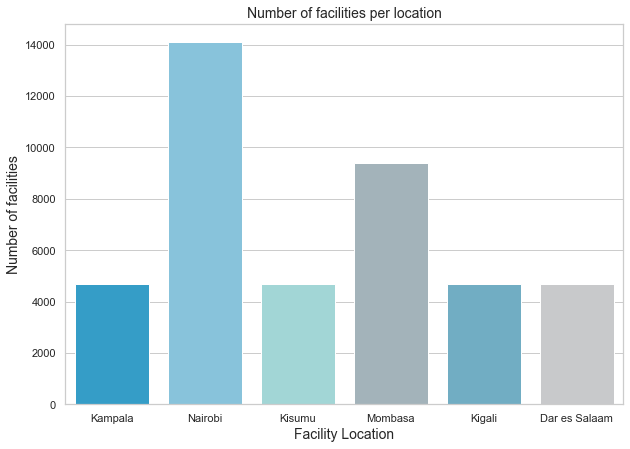

In [181]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.set_palette(['#1DA7DF', '#7AC9E9', '#99DFDE', '#9FB5BE', '#64B3D0', '#C7C9CB'])
sns.countplot(data=data, x='Facility Location')
plt.xlabel("Facility Location", size=14)
plt.ylabel("Number of facilities", size=14)
plt.title("Number of facilities per location", size=14)
plt.savefig('location facilities')
plt.show()

###### AgeGroup distribution

In [182]:
# defining age groups and their corresponding labels
age_bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61+']

# use pd.cut to create a new column with the age groups
data['Age group distribution'] = pd.cut(data['AgeLastVisit'], bins=age_bins, labels=age_labels)
data.head(3)

,Facility Location,PatientID,AgeLastVisit,AgeGroup,Gender,Registration Date,ART Status,LastRegimen,LastRegimenLine,LastCD4,LastWHO,LastVisit,LastStatus,Age group distribution
0,Kampala,1,61.7,Adult,Female,2006-12-29,ART,3TC+EFV+TDF,NaN,882.0,1.0,2017-02-17,Active,61+
1,Nairobi,2,52.8,Adult,Male,2006-01-04,ART,3TC+AZT+NVP,First line,409.0,1.0,2017-03-28,Active,51-60
2,Kisumu,3,44.7,Adult,Female,2006-01-18,ART,3TC+AZT+NVP,NaN,NaN,1.0,2017-03-13,Active,41-50


In [183]:
AgeGroup_distribution=data['Age group distribution'].value_counts().reset_index()
#percentage coulmn
TotalDistribution=AgeGroup_distribution['Age group distribution'].sum()
AgeGroup_distribution['Percentage distribution']=(AgeGroup_distribution['Age group distribution']/TotalDistribution*100).round(2)
AgeGroup_distribution.sort_values(by='index', ascending=True)

,index,Age group distribution,Percentage distribution
6,0-10,1277,3.02
3,11-20,3270,7.73
4,21-30,3261,7.71
1,31-40,10858,25.66
0,41-50,14090,33.30
2,51-60,7194,17.00
5,61+,2366,5.59


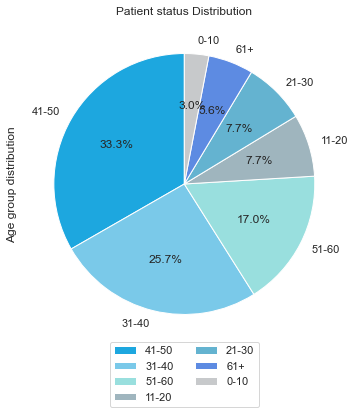

In [184]:
# Create the pie chart
fig, ax = plt.subplots(figsize=(6,6))
#Pallette color
pallette=['#1DA7DF','#7AC9E9','#99DFDE','#9FB5BE','#64B3D0','#5D8BE2','#C7C9CB']
AgeGroup_distribution.plot.pie(y='Age group distribution', labels=AgeGroup_distribution['index'], autopct='%1.1f%%', startangle=90, ax=ax, colors=pallette)
ax.set_title('Patient status Distribution')
# moving the legend to the bottom and adjust the padding
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.savefig('agedistribution')
plt.show()

In [185]:
AgeGroup_dist=data['AgeGroup'].value_counts().reset_index()
AgeGroup_dist

,index,AgeGroup
0,Adult,39342
1,Paed,2975


###### Mean age

In [186]:
mean_age=np.mean(data['AgeLastVisit'])
mean_age

40.33905995226421

##### Patient Status

In [187]:
patient_status=data['LastStatus'].value_counts().reset_index()
#Percentage for LAstStatus
Total_LastStatus=patient_status['LastStatus'].sum()
patient_status['LastStatusPercentage']=(patient_status['LastStatus']/Total_LastStatus*100).round(2)
patient_status

,index,LastStatus,LastStatusPercentage
0,Active,40524,95.76
1,Defaulter,1711,4.04
2,Lost ND,74,0.17
3,Transfer,5,0.01
4,Lost,2,0.00
5,Death,1,0.00


In [188]:
# # Create the pie chart
# fig, ax = plt.subplots()
# patient_status.plot.pie(y='LastStatusPercentage', labels=patient_status['index'], autopct='%1.1f%%', startangle=90)
# # Add a title
# ax.set_title('Patient status Distribution')
# plt.show()

##### LastWHO Status

In [204]:
lastWHO=data['LastWHO'].value_counts().reset_index()
lastWHO

,index,LastWHO
0,1.0,34073
1,3.0,4010
2,2.0,3508
3,4.0,647


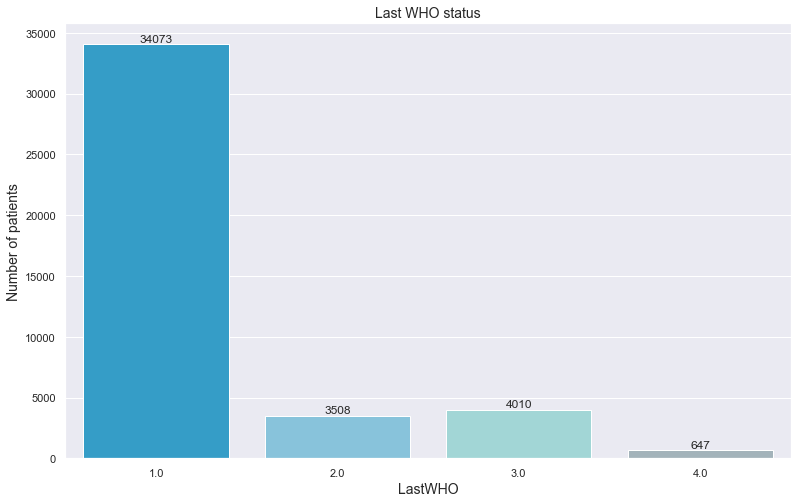

In [210]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')
ax=sns.barplot(data=lastWHO, x='index', y='LastWHO')
# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.xlabel("LastWHO", size=14)
plt.ylabel("Number of patients", size=14)
plt.title("Last WHO status", size=14)
plt.savefig('who')
plt.show()


##### Gender distribution

In [189]:
gender=data['Gender'].value_counts().reset_index()
gender

,index,Gender
0,Female,28555
1,Male,13762


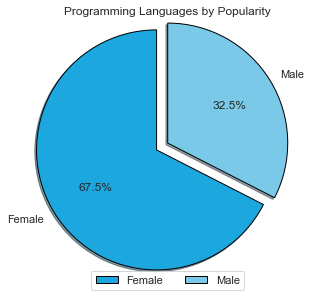

In [190]:
fig, ax = plt.subplots()
gender.plot.pie(y='Gender', labels = gender['index'], wedgeprops= {'edgecolor': 'black'},startangle=90, 
                explode = (0.15,0), shadow= True, radius= 1.38, autopct='%1.1f%%',ax=ax)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.title('Programming Languages by Popularity', pad=20)
plt.savefig('gender')
plt.show()

In [191]:
# from pygooglechart import PieChart3D
# # Create the chart object
# chart = PieChart3D(600, 400)
# # Add the data
# chart.add_data(gender['Gender'])
# # Set the labels
# chart.set_pie_labels(gender['index'])
# # Set the title
# chart.set_title('Gender Distribution')
# # Download the chart as a PNG image file
# chart.download('gender_distribution.png')

###### ART Status

In [192]:
ART_status=data['ART Status'].value_counts().reset_index()
ART_status

,index,ART Status
0,ART,42117
1,Non-ART,200


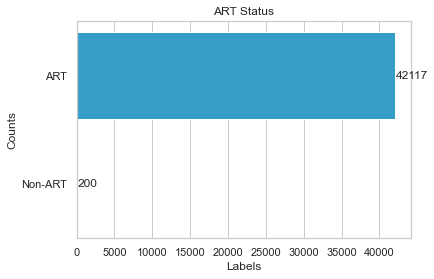

In [196]:
# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(y="index", x="ART Status", data=ART_status)

# Set the plot title and axis labels
ax.set_title("ART Status")
ax.set_xlabel("Labels")
ax.set_ylabel("Counts")

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type="edge")

plt.savefig('ART')
plt.show()

### Most regimen per year
- The most used regimen per year (you will need to determine the time range using the data provided)

In [24]:
last_regime_metrics=data['LastRegimenLine'].value_counts(dropna=False).reset_index()
last_regime_metrics

,index,LastRegimenLine
0,First line,36724
1,Second line,3432
2,NaN,2119
3,PMTCT,36
4,First line substitute,5
5,PEP,1


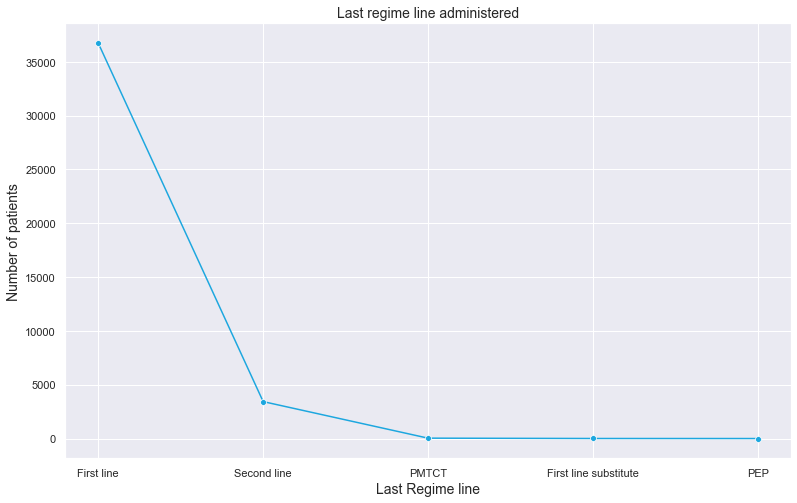

In [251]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')
sns.lineplot(data=last_regime_metrics, y='LastRegimenLine', x='index', marker='o' ) # add marker style to line plot

plt.xlabel("Last Regime line", size=14)
plt.ylabel("Number of patients", size=14)
plt.title("Last regime line administered", size=14)

plt.savefig('regime')
plt.show()


### Gender group registration per year

In [26]:
#creating year of registration column
data['Registration Date']=pd.to_datetime(data['Registration Date'])
data['Registration Year']=pd.to_datetime(data['Registration Date']).dt.year

#grouping according to year
#yearly_registration=data.groupby(['Registration Year'])['Gender'].count().reset_index()
yearly_registration = data.groupby(['Registration Year', 'Gender']).size().unstack(fill_value=0)

yearly_registration

Gender,Female,Male
Registration Year,,
1970,0,1
1973,1,0
2000,0,1
2001,1,0
2002,17,10
2003,36,25
2004,332,185
2005,1282,693
2006,2296,1006


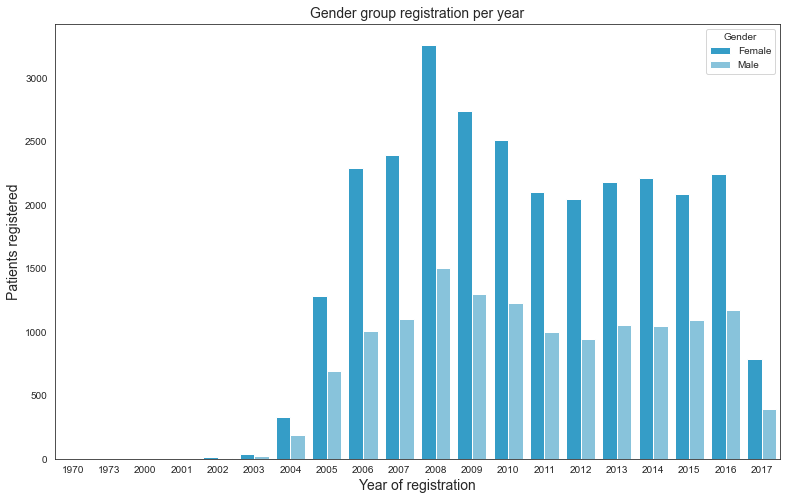

In [71]:
plt.figure(figsize=(13,8))
sns.countplot(data=data, x='Registration Year', hue='Gender')
plt.xlabel("Year of registration", size=14)
plt.ylabel("Patients registered", size=14)
plt.title("Gender group registration per year", size=14)

plt.show()

### Age-group profile based on regimen line per year

In [91]:
last_regime_metrics_yearly=data.groupby(['LastRegimenLine', 'AgeGroup']).size().unstack(fill_value=0)
last_regime_metrics_yearly

AgeGroup,Adult,Paed
LastRegimenLine,,
First line,34335,2389
First line substitute,5,0
PEP,0,1
PMTCT,35,1
Second line,3019,413
